In [1]:
import numpy as np
import matplotlib.pyplot as plt
from trainer import Trainer
from dataloader import Dataloader
from classifiers import LogisticRegression, SoftmaxRegression

In [2]:
def plot_confusion_matrix(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    NOTE: Code borrowed from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html


    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontsize=18)
    ax.set_yticklabels(row_labels, fontsize=18)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
        
    # Loop over data dimensions and create text annotations.
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            text = ax.text(j, i, '{:3.2f}'.format(data[i, j]),
                           ha="center", va="center", color="w", fontweight='bold', fontsize=18)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def visualize_weights(weight, eigen_vectors):
    '''
    Return the fig, axs of the weights visualized
    
    :param weight: 2D numpy array (p+1 x c)
    :param eigen_vectors: eigen vectors of train set (dxp)
    '''

    num_classes = weight.shape[1]
    
    fig, axs = plt.subplots(2, 3, figsize=(10,10))
    axs = axs.flatten()
    fig.suptitle('Weights visualized as faces', fontsize=20, fontweight='bold')
    axs = axs.flatten()
    for i in range(num_classes): # 25, 1
        weights_visual = eigen_vectors @ weight[1:, i]
        axs[i].imshow(weights_visual.reshape(224,-1), cmap='gray') # Each col of weight is an image
        axs[i].set_title('Weight {}'.format(i))

    return fig, axs

In [3]:
lr = 1e-3
num_epochs = 50
num_pca_comps = 25
k = 10 #number of folds

dl = Dataloader("./facial_expressions_data/aligned/")
emotions = ['anger', 'happiness', 'disgust', 'sadness', 'fear', 'surprise']
method = 'batch'
cl = SoftmaxRegression(len(emotions))

trainer = Trainer(cl, dl, emotions, method)
train_eval, val_eval, test_eval, cm_eval = trainer.train(lr, num_epochs, num_pca_comps, k)

train_error = np.array(train_eval)[:,:,0]
train_accuracy = np.array(train_eval)[:,:,1]
val_error = np.array(val_eval)[:,:,0]
val_accuracy = np.array(val_eval)[:,:,1]
test_error = np.array(test_eval)[:,0]
test_accuracy = np.array(test_eval)[:,1]

std_dev_epochs = [9, 19, 29, 39, 49]
mask = np.zeros((num_epochs), dtype = int)
mask[std_dev_epochs] = 1
mask = list(mask)

mean_train_error = np.mean(train_error, axis=0)
std_dev_train_error = np.std(train_error, axis=0)
mean_val_error = np.mean(val_error, axis=0)
std_dev_val_error = np.std(val_error, axis=0)

mean_train_accuracy = np.mean(train_accuracy, axis=0)
std_dev_train_accuracy = np.std(train_accuracy, axis=0)
mean_val_accuracy = np.mean(val_accuracy, axis=0)
std_dev_val_accuracy = np.std(val_accuracy, axis=0)

Emotions: ['fear', 'surprise', 'sadness', 'happiness', 'anger', 'disgust'] 

fear: 25 # of images
surprise: 83 # of images
sadness: 28 # of images
happiness: 69 # of images
anger: 45 # of images
disgust: 59 # of images

Balanced Set:
anger: 25 # of images
happiness: 25 # of images
disgust: 25 # of images
sadness: 25 # of images
fear: 25 # of images
surprise: 25 # of images
Best on fold #1, epoch 27, loss: 0.03620861616219907    accuracy: 0.8
Best on fold #2, epoch 34, loss: 0.03717373512297458    accuracy: 0.6666666666666666
Best on fold #3, epoch 34, loss: 0.015869518974039033    accuracy: 0.6
Best on fold #4, epoch 46, loss: 0.056195593166755015    accuracy: 0.5333333333333333
Best on fold #5, epoch 23, loss: 0.08372591122291748    accuracy: 0.4
Best on fold #6, epoch 43, loss: 0.05871434399910942    accuracy: 0.4
Best on fold #7, epoch 15, loss: 0.03147018273855019    accuracy: 0.7333333333333333
Best on fold #8, epoch 31, loss: 0.026962105680543323    accuracy: 0.8666666666666667
B

# Final performace stats

In [5]:
mean_test_error = np.mean(test_error)
std_dev_test_error = np.std(test_error)

mean_test_accuracy = np.mean(test_accuracy)
std_dev_test_accuracy = np.std(test_error)


# 6 a, i) Train and Val loss averaged over folds

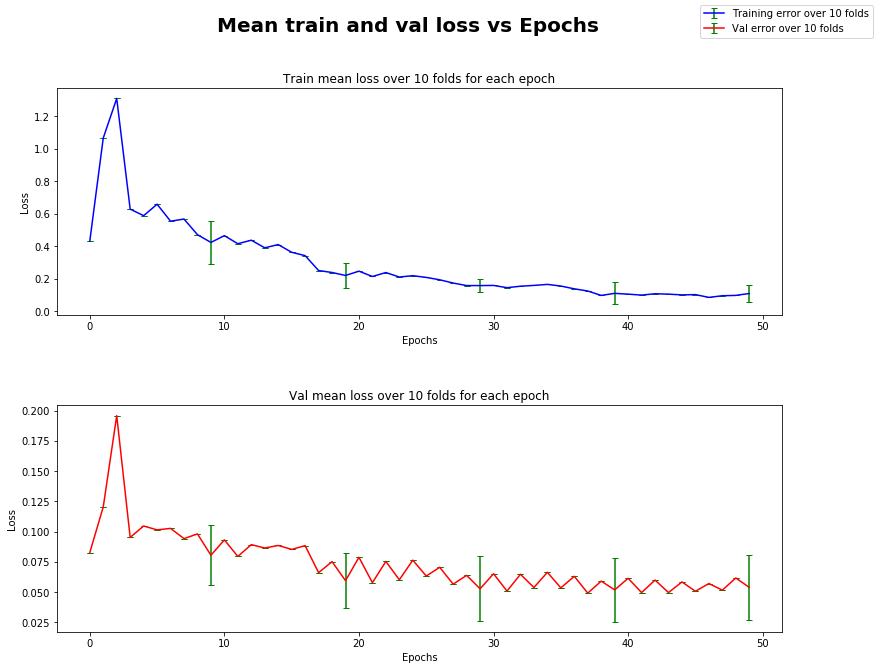

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(13,10))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Mean train and val loss vs Epochs', fontsize=20, fontweight='bold')

# Train loss
axs[0].errorbar(range(len(mean_train_error)), mean_train_error, std_dev_train_error*mask, c = 'b', ecolor='g', capsize=3, 
            label = 'Training error over 10 folds')
axs[0].set_title('Train mean loss over 10 folds for each epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
# Val loss
axs[1].errorbar(range(len(mean_val_error)), mean_val_error, std_dev_val_error*mask, c= 'r', ecolor='g', capsize=3, 
            label = 'Val error over 10 folds')
axs[1].set_title('Val mean loss over 10 folds for each epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
fig.legend()

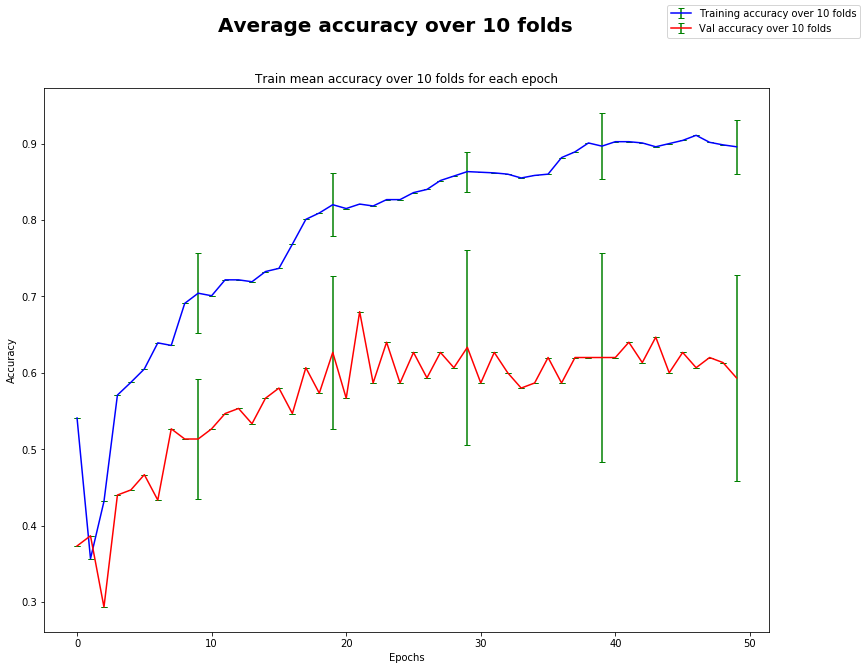

In [17]:
fig, ax = plt.subplots(figsize=(13,10))
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Average accuracy over 10 folds', fontsize=20, fontweight='bold')
ax.errorbar(range(len(mean_train_accuracy)), mean_train_accuracy, std_dev_train_accuracy*mask, ecolor='g', capsize=3, 
            label = 'Training accuracy over 10 folds', c='b')
ax.errorbar(range(len(mean_val_accuracy)), mean_val_accuracy, std_dev_val_accuracy*mask, ecolor='g', capsize=3, 
            label = 'Val accuracy over 10 folds', c='r')
ax.set_title('Train mean accuracy over 10 folds for each epoch')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
fig.legend()

# 6 a, ii) Confusion matrix averaged over all folds

In [ ]:
cm_avg = np.array(cm_eval).mean(axis=0)
fig, ax = plt.subplots(figsize=(9,9))
fig.suptitle('Confusion matrix for all folds', fontsize=20, fontweight='bold')
im, cbar = plot_confusion_matrix(cm_avg, emotions, emotions, ax)
plt.show()

In [ ]:
weights_eval = []
for fold in range(k):
    weight = trainer.load_model(fold)
    weights_eval.append(weight)

fig, axs = visualize_weights(weights_eval[0], dl.top_p_eig_vectors)
plt.show()